In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/kaggle/input/google-stock-market-data-2024/GOOG.csv'
df = pd.read_csv(path)
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
1,2024-01-02,139.21810913085938,139.55999755859375,140.61500549316406,137.74000549316406,139.60000610351562,20071900
2,2024-01-03,140.01614379882812,140.36000061035156,141.08999633789062,138.42999267578125,138.60000610351562,18974300
3,2024-01-04,137.7018280029297,138.0399932861328,140.63499450683594,138.00999450683594,139.85000610351562,18253300
4,2024-01-05,137.0534210205078,137.38999938964844,138.80999755859375,136.85000610351562,138.3520050048828,15433200


In [3]:
df.to_csv("google_stock.csv", index=False)

In [4]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nFirst 5 Rows:\n", df.head())

Shape: (234, 7)

Columns:
 ['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

Data Types:
 Price        object
Adj Close    object
Close        object
High         object
Low          object
Open         object
Volume       object
dtype: object

Missing Values:
 Price        0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

First 5 Rows:
         Price           Adj Close               Close                High  \
0      Ticker                GOOG                GOOG                GOOG   
1  2024-01-02  139.21810913085938  139.55999755859375  140.61500549316406   
2  2024-01-03  140.01614379882812  140.36000061035156  141.08999633789062   
3  2024-01-04   137.7018280029297   138.0399932861328  140.63499450683594   
4  2024-01-05   137.0534210205078  137.38999938964844  138.80999755859375   

                  Low                Open    Volume  
0                GOOG                GOOG      GOOG  
1  137.7400054931

In [5]:
df = df.drop(0)

In [6]:
df.rename(columns={"Price": "Date"}, inplace=True)
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
for col in ["Adj Close","Close","High","Low","Open","Volume"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [8]:
print(df.describe().T)

           count                           mean                  min  \
Date         233  2024-06-18 02:40:41.201716736  2024-01-02 00:00:00   
Adj Close  233.0                     163.027842           132.235245   
Close      233.0                     163.267468           132.559998   
High       233.0                     164.852056           134.020004   
Low        233.0                     161.706751           131.550003   
Open       233.0                     163.229859           132.740005   
Volume     233.0                19525012.017167            7409100.0   

                           25%                  50%                  75%  \
Date       2024-03-26 00:00:00  2024-06-18 00:00:00  2024-09-11 00:00:00   
Adj Close            151.56778           164.892944           173.454025   
Close               151.940002           165.050003           173.880005   
High                153.199997           166.970001           175.880005   
Low                 151.029999           16

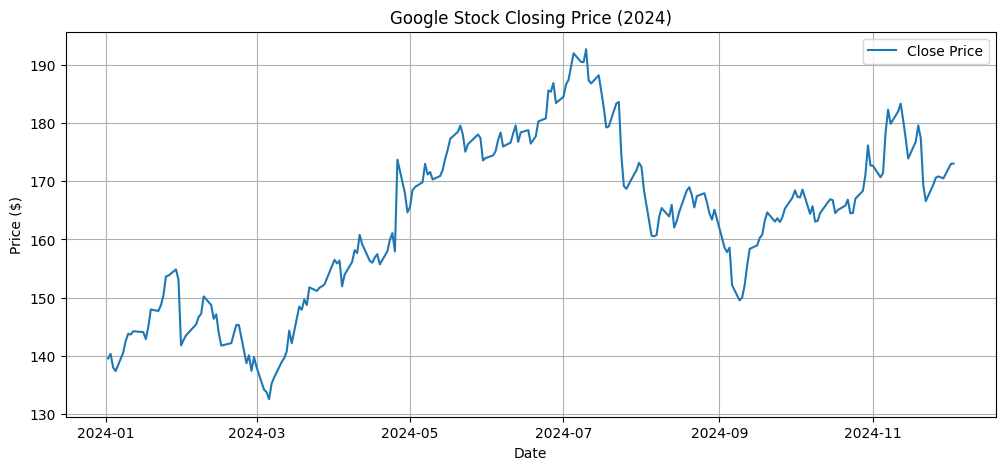

In [9]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.title("Google Stock Closing Price (2024)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

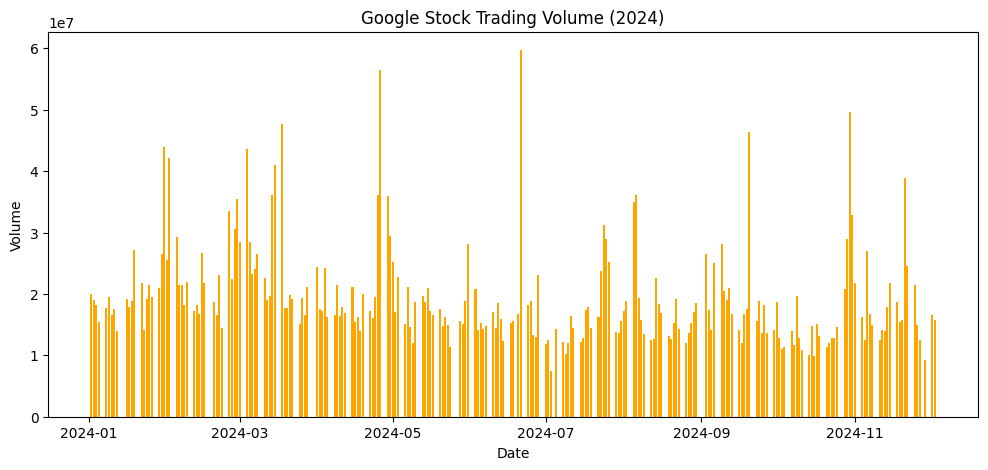

In [10]:
plt.figure(figsize=(12,5))
plt.bar(df["Date"], df["Volume"], color="orange")
plt.title("Google Stock Trading Volume (2024)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


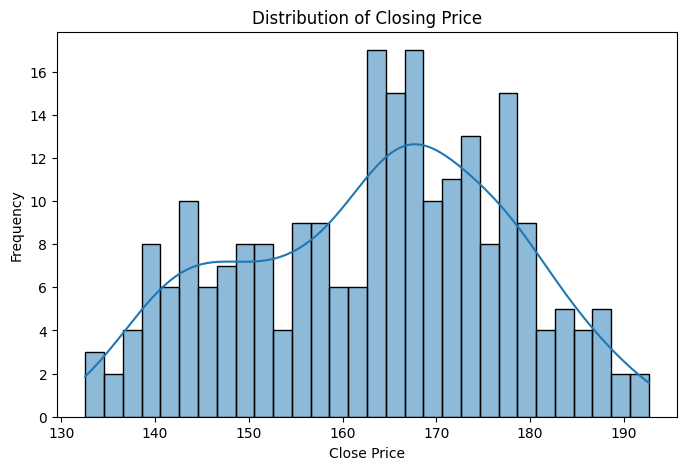

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["Close"], bins=30, kde=True)
plt.title("Distribution of Closing Price")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

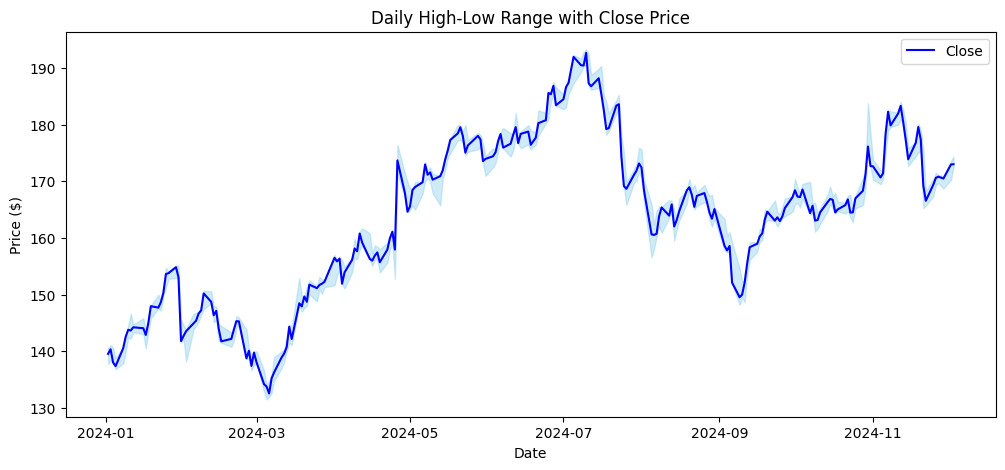

In [12]:
plt.figure(figsize=(12,5))
plt.fill_between(df["Date"], df["Low"], df["High"], color="skyblue", alpha=0.4)
plt.plot(df["Date"], df["Close"], color="blue", label="Close")
plt.title("Daily High-Low Range with Close Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

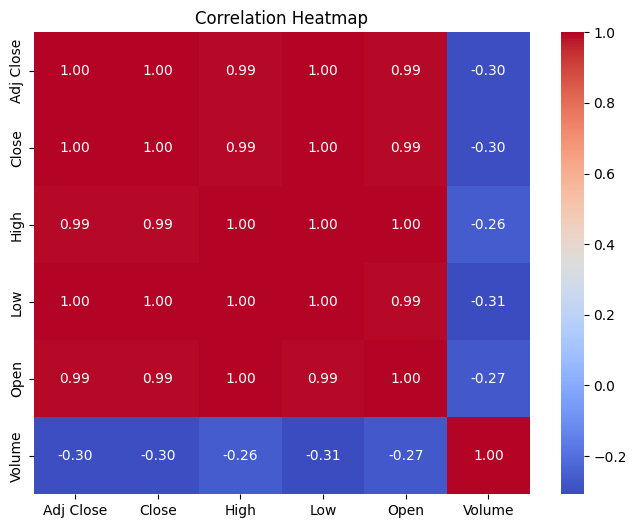

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Adj Close","Close","High","Low","Open","Volume"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [14]:
df["MA7"] = df["Close"].rolling(window=7).mean()
df["MA30"] = df["Close"].rolling(window=30).mean()

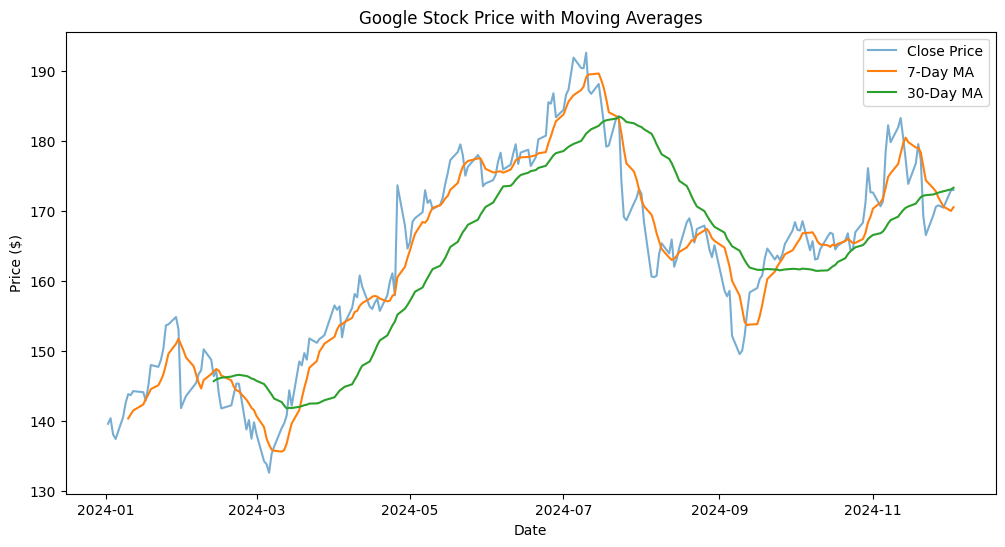

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label="Close Price", alpha=0.6)
plt.plot(df["Date"], df["MA7"], label="7-Day MA")
plt.plot(df["Date"], df["MA30"], label="30-Day MA")
plt.title("Google Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [16]:
df.to_csv("google_stock_clean.csv", index=False)
